In [769]:
#A bike-sharing Modelsystem for BoomBikes 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')



In [770]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [771]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [772]:
#instant coloumn is not needed as it is unique values
#dtedate column is also not needed.
df = df.drop(['instant',"dteday"], axis = 1) 
 #beacuse we already have year and month coloumn 

In [773]:
#drop one of the coloumn from temp and atemp as they are highly co-realated
df = df.drop(['temp'], axis = 1) 


In [774]:
#dropping  casual registered 
df = df.drop(['casual','registered'], axis = 1) 
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,11.58500,48.3333,23.500518,1796


### EDA

In [775]:
#a. Percentage of missing values of all the columns.
df.isnull().sum(axis = 0)

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [776]:
#Percentage of missing values
percent_missing = df.isnull().sum(axis = 0) * 100 / len(df)
print(percent_missing)  #column-wise null percentages here
df.shape

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64


(730, 11)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

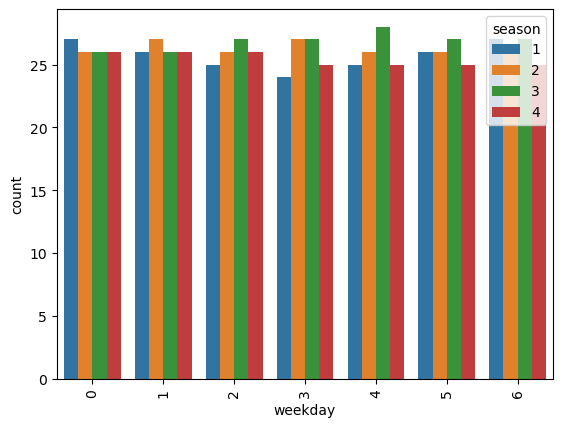

In [777]:
#comparing season columns with weekday

sns.countplot(x='weekday',hue='season',data=df)
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

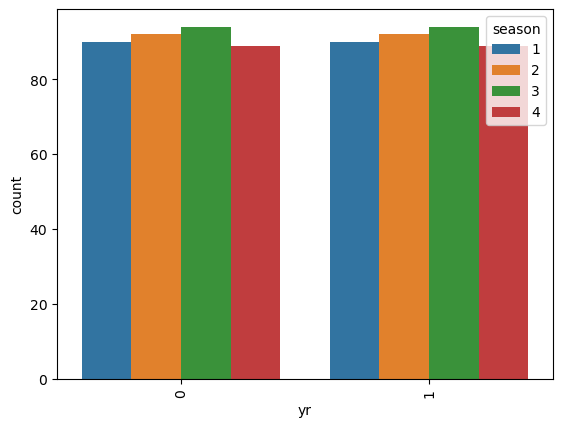

In [778]:
#comparing season columns with year

sns.countplot(x='yr',hue='season',data=df)
plt.xticks(rotation=90)

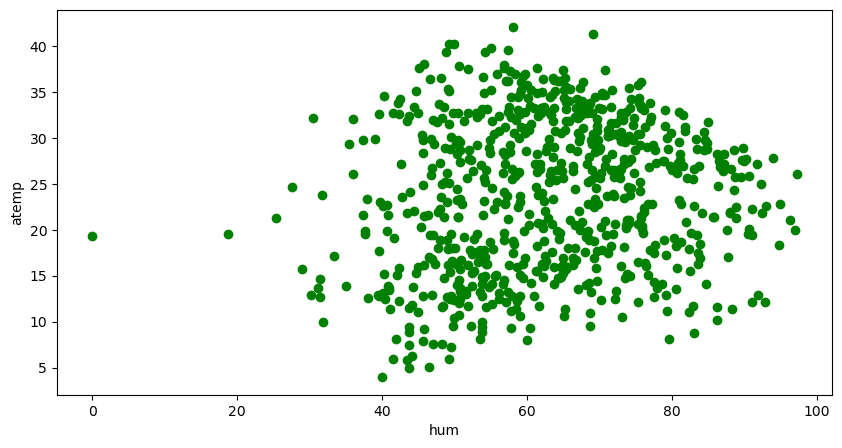

In [779]:
#bivariate analysis for humiduty vs atemp
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(df.hum,df.atemp,color='g')
plt.xlabel('hum')
plt.ylabel('atemp')
plt.show()

# Data Preparation

In [780]:
# Converting the categrorical variables to meet the requirements.

df['season']= df['season'].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
df['mnth']= df['mnth'].map({1:"Jan", 2:"Feb", 3:"March", 4:"April",5:"May",6:"June",7:"July",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})
df['weekday']= df['weekday'].map({0:"sunday",1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday",5:"Friday",6:"Sat"})
df['weathersit']= df['weathersit'].map({1:"Clear", 2:"Mist + Cloudy", 3:"Light Snow", 4:"Heavy Rain + Ice Pallets"})


df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,sunday,0,Mist + Cloudy,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,1600


In [781]:
status2 = pd.get_dummies(df["mnth"])
status2.head()

,April,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [782]:
status3 = pd.get_dummies(df["weekday"])
status3.head()

,Friday,Monday,Sat,Thursday,Tuesday,Wednesday,sunday
0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0


In [783]:
status4 = pd.get_dummies(df["weathersit"])
status4.head()

,Clear,Light Snow,Mist + Cloudy
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [784]:
status1 = pd.get_dummies(df["season"])
status1.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [785]:
#Concatinate the Dummy df with the originol data frame
df = pd.concat([df,status1,status2,status3,status4],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,Friday,Monday,Sat,Thursday,Tuesday,Wednesday,sunday,Clear,Light Snow,Mist + Cloudy
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,sunday,0,Mist + Cloudy,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Monday,1,Clear,9.47025,43.7273,16.636703,...,0,1,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,...,0,0,0,0,1,0,0,1,0,0
4,spring,0,Jan,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,...,0,0,0,0,0,1,0,1,0,0


In [786]:
#Dropping the categorical variable as they are already Dummified.

df = df.drop(['season','mnth','weekday','weathersit'], axis = 1) 
df

,yr,holiday,workingday,atemp,hum,windspeed,cnt,fall,spring,summer,...,Friday,Monday,Sat,Thursday,Tuesday,Wednesday,sunday,Clear,Light Snow,Mist + Cloudy
0,0,0,0,18.18125,80.5833,10.749882,985,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,1,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,11.33210,65.2917,23.458911,2114,0,1,0,...,0,0,0,1,0,0,0,0,0,1
726,1,0,1,12.75230,59.0000,10.416557,3095,0,1,0,...,1,0,0,0,0,0,0,0,0,1
727,1,0,0,12.12000,75.2917,8.333661,1341,0,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,11.58500,48.3333,23.500518,1796,0,1,0,...,0,0,0,0,0,0,1,1,0,0


# Splitting into train and test

In [787]:
df_train, df_test = train_test_split(df,train_size = 0.7,test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 33)
(219, 33)


In [788]:
#Re-scaling the variable by using MinMax scaling
#1. Instantiate  an object
scaler =  MinMaxScaler()

#2. create a list of numeric variabel
num_vars = ["atemp","hum","windspeed","cnt"]

# Fit the data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()


,yr,holiday,workingday,atemp,hum,windspeed,cnt,fall,spring,summer,...,Friday,Monday,Sat,Thursday,Tuesday,Wednesday,sunday,Clear,Light Snow,Mist + Cloudy
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,0,...,0,0,0,0,1,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,1,0,0,...,0,0,0,0,1,0,0,1,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,0,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,0,1,0,...,0,0,0,0,0,0,1,1,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [789]:
df_train[num_vars].describe()
#Min value is 0 an Max value is 1

,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.512989,0.650369,0.320768,0.513620
std,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000
25%,0.332086,0.538643,0.199179,0.356420
50%,0.526811,0.653714,0.296763,0.518638
75%,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


In [790]:
#X_train and y_train
y_train = df_train.pop("cnt")
X_train = df_train

In [791]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,fall,spring,summer,winter,...,Friday,Monday,Sat,Thursday,Tuesday,Wednesday,sunday,Clear,Light Snow,Mist + Cloudy
653,1,0,1,0.501133,0.575354,0.300794,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
426,1,0,0,0.438975,0.640189,0.255342,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [792]:
X_train.shape

(510, 32)

### RFE

In [793]:
#importing RFE and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [794]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [795]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', False, 16),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', False, 15),
 ('hum', False, 18),
 ('windspeed', False, 17),
 ('fall', False, 12),
 ('spring', False, 14),
 ('summer', False, 13),
 ('winter', False, 11),
 ('April', False, 3),
 ('Aug', True, 1),
 ('Dec', False, 6),
 ('Feb', False, 7),
 ('Jan', False, 8),
 ('July', True, 1),
 ('June', True, 1),
 ('March', False, 5),
 ('May', True, 1),
 ('Nov', False, 4),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Friday', True, 1),
 ('Monday', True, 1),
 ('Sat', False, 10),
 ('Thursday', True, 1),
 ('Tuesday', True, 1),
 ('Wednesday', True, 1),
 ('sunday', False, 9),
 ('Clear', True, 1),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1)]

In [796]:
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'Aug', 'July', 'June', 'May', 'Sep', 'Friday',
       'Monday', 'Thursday', 'Tuesday', 'Wednesday', 'Clear', 'Light Snow',
       'Mist + Cloudy'],
      dtype='object')

In [797]:
X_train.columns[~rfe.support_]

Index(['yr', 'atemp', 'hum', 'windspeed', 'fall', 'spring', 'summer', 'winter',
       'April', 'Dec', 'Feb', 'Jan', 'March', 'Nov', 'Oct', 'Sat', 'sunday'],
      dtype='object')

# Data Modelling and Evaluation

In [798]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'fall',
       'spring', 'summer', 'winter', 'April', 'Aug', 'Dec', 'Feb', 'Jan',
       'July', 'June', 'March', 'May', 'Nov', 'Oct', 'Sep', 'Friday', 'Monday',
       'Sat', 'Thursday', 'Tuesday', 'Wednesday', 'sunday', 'Clear',
       'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [799]:
# Creating a X_test  dataframe with RFE selected variable.
X_train_rfe =  X_train[col]

#Adding a constant variable
X_train_rfe =  sm.add_constant(X_train_rfe)

#Create the model
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model


#params
print(lm.summary())

Index(['const', 'holiday', 'workingday', 'Aug', 'July', 'June', 'May', 'Sep',
       'Friday', 'Monday', 'Thursday', 'Tuesday', 'Wednesday', 'Clear',
       'Light Snow', 'Mist + Cloudy'],
      dtype='object')
     const  holiday  workingday  Aug  July  June  May  Sep  Friday  Monday  \
653    1.0        0           1    0     0     0    0    0       0       0   
576    1.0        0           1    0     1     0    0    0       0       0   
426    1.0        0           0    0     0     0    0    0       0       0   
728    1.0        0           0    0     0     0    0    0       0       0   
482    1.0        0           0    0     0     0    0    0       0       0   
..     ...      ...         ...  ...   ...   ...  ...  ...     ...     ...   
526    1.0        0           1    0     0     1    0    0       0       1   
578    1.0        0           1    1     0     0    0    0       0       0   
53     1.0        0           1    0     0     0    0    0       0       0   
350    1.

In [800]:
#P values of variable greater than 0.5
#Significane (p-value) and VIF

X_train_new = X_train_rfe.drop(['holiday'], axis = 1) 
X_train_new.columns

Index(['const', 'workingday', 'Aug', 'July', 'June', 'May', 'Sep', 'Friday',
       'Monday', 'Thursday', 'Tuesday', 'Wednesday', 'Clear', 'Light Snow',
       'Mist + Cloudy'],
      dtype='object')

In [801]:
#Adding a constant variable

X_train_lm = sm.add_constant(X_train_new)

#Create the model
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model


#params
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     19.03
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           3.57e-36
Time:                        00:49:35   Log-Likelihood:                 141.69
No. Observations:                 510   AIC:                            -255.4
Df Residuals:                     496   BIC:                            -196.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2401      0.017     14.526

In [802]:

#X_train_new = X_train_new.drop(['Clear'], axis = 1) 
X_train_new.columns

Index(['const', 'workingday', 'Aug', 'July', 'June', 'May', 'Sep', 'Friday',
       'Monday', 'Thursday', 'Tuesday', 'Wednesday', 'Clear', 'Light Snow',
       'Mist + Cloudy'],
      dtype='object')

### VIF

In [803]:
# Create a dataframe that will contain the feature varibale and their VIF

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Clear,inf
13,Light Snow,inf
14,Mist + Cloudy,inf
1,workingday,9.76
11,Wednesday,7.23
10,Tuesday,6.33
9,Thursday,6.12
7,Friday,6.04
8,Monday,5.62
3,July,1.07


### Residual Analysis of the train data¶
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [804]:
y_train_cnt = lm.predict(X_train_lm)

In [805]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

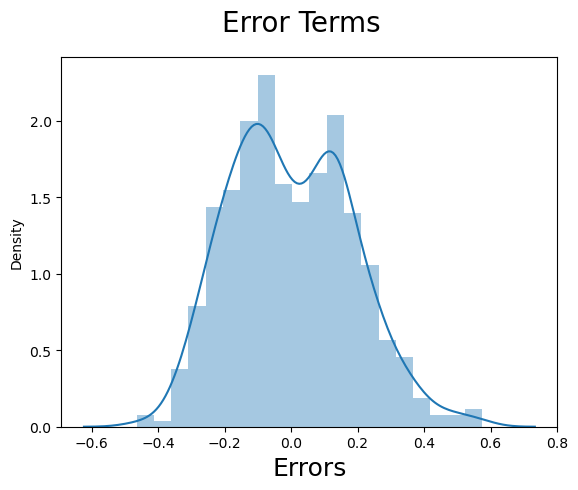

In [806]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

In [807]:
num_vars = ["atemp","hum","windspeed","cnt"]

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [808]:
y_test = df_test.pop('cnt')
X_test = df_test

In [809]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test['const'] = 1
X_test_new = X_test[X_train_new.columns]
X_test_new.drop('const',axis=1,inplace=True)
X_test.drop('const',axis=1,inplace=True)


# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [810]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

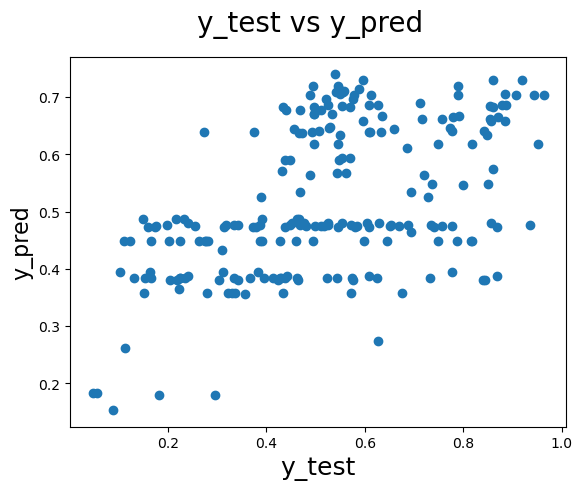

In [811]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### Summary from the model



 we used variables atemp, hum, windspeed as the contonous variable
season is a categorical coloumn
year binary
month catrgorical
holiday binary
weekday categorical coloumn (0 -sunday, 1-monday, 6-saturday)
working day- binary
weather set- categorical coloumn
temp and atemp(adjusted)- we used atemp and dropped other as they are highly co-realated
drop casual and register, beacause these 2 variables won't be there at the time of making predections, 

We had cnt is as our targeted variable and we calculated VIF from that.


The Values of VIF

Features	VIF
3	windspeed	3.57
2	workingday	3.28
5	winter	2.55
0	yr	1.89
8	Nov	1.75
4	spring	1.59
9	Sat	1.58
11	Mist + Cloudy	1.52
6	Dec	1.41
7	July	1.13
1	holiday	1.12
10	Light Snow	1.09